In [1]:
import numpy as np
import simple_model_ode as sm

In [5]:
LDM = sm.SimplifiedModel(data_analysis=False)
state = [np.deg2rad(17), 0, 0,  0 , 0, 0]
LDM.inverseLinkLegODE(state)

array([-6.41574,  0.     ])

time spent 0.007699251174926758


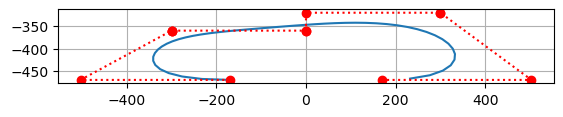

In [5]:
from Bezier import Bezier
import numpy as np
from numpy import array as a
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
t_points = np.arange(0, 1, 0.02)

v_desire = 1000
T_sw = 0.25

test = a([[-170, -470],
          [-(170 + v_desire/((12)*T_sw)), -470],
          [-300, -360],
          [-300, -360],
          [-300, -360],
          [0, -360],
          [0, -360],
          [0, -320],
          [300, -320],
          [300, -320],
          [170 + v_desire/((12)*T_sw), -470],
          [170, -470]])


t = time.time()
test_set_1 = Bezier.Curve(t_points, test)
print("time spent", time.time() - t)

# plt.xticks([i1 for i1 in range(-20, 20)]), plt.yticks([i1 for i1 in range(-20, 20)])

plt.gca().set_aspect('equal', adjustable='box')
plt.grid(b=True, which='major', axis='both')

plt.plot(test_set_1[:, 0], test_set_1[:, 1])
plt.plot(test[:, 0], test[:, 1], 'ro:')
plt.show()

Fitting Polynomial [ 4.11916505e+05 -6.26591689e+05  4.03501845e+05 -1.42028997e+05
  2.93956532e+04 -3.56716856e+03  2.44492931e+02 -7.12887643e+00]


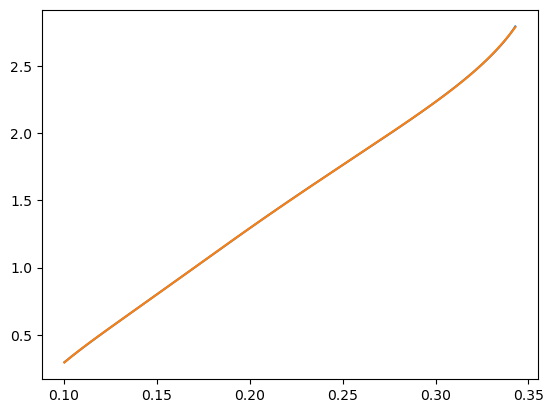

[[2.23187488]
 [0.        ]]
0.29670597283903605
[[ 0.        ]
 [-0.29994582]]


In [5]:
import numpy as np
import LegKinematics as lk
import matplotlib.pyplot as plt


lk.FowardKinematics(np.array([[np.deg2rad(17)], [0]]))
ths = np.linspace(np.deg2rad(17), np.deg2rad(160), 1000)

z_list = []

for th in ths:
    state = np.array([[th], [0]])
    z_list.append(-1 * lk.FowardKinematics(state)[1,0])

# p = np.polyfit(ths, z_list, 6)
# print("Fitting Polynomial", p)
# z_fit = np.polyval(p, ths)
# plt.plot(ths, z_list)
# plt.plot(ths, z_fit)
# plt.show()

p = np.polyfit(z_list, ths, 7)
print("Fitting Polynomial", p)
th_fit = np.polyval(p, z_list)
plt.plot(z_list, ths)
plt.plot(z_list, th_fit)
plt.show()

print(lk.InverseKinematicsPoly(np.array([[0], [-0.3]])))
print(np.deg2rad(17))

tb = lk.InverseKinematicsPoly(np.array([[0], [-0.3]]))
print(lk.FowardKinematics(tb))

[0.2 0. ]


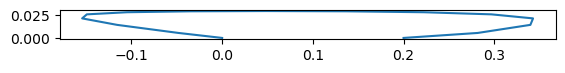

In [5]:
from Bezier import Bezier
import numpy as np
from numpy import array as a
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

bp=np.array([ 3.00000000e-02,  2.00000000e-02,  2.22360063e-02,  1.94213255e-01,
        1.00000000e-02,  3.44995359e-02,  2.00000000e-02,  1.08131972e-02,
        1.81578498e-01, -4.06979083e-02,  1.00000000e-02,  6.26859409e-02,
        3.00000000e-02,  2.00000000e-02,  1.00000000e-02,  2.34862323e-01,
        1.00000000e-02, -2.45609053e-01,  3.00000000e-02,  8.93002142e-15,
        1.00000000e-02,  2.33512001e-01,  8.94036976e-02,  1.85966538e-01])

bp = bp.reshape(4, -1)
idx = 3
L = 0.2
h = bp[idx, 0]
dh = bp[idx, 1]
dL1 = bp[idx, 2]
dL2 = bp[idx, 3]
dL3 = bp[idx, 4]
dL4 = bp[idx, 5]

c0 = np.array([0,0])
c1 = c0 - np.array([dL1, 0])
c2 = c1 - np.array([dL2, 0]) + np.array([0, h])
c3 = c2
c4 = c2
c5 = c4 + np.array([0.5 * L + dL1 + dL2, 0])
c6 = c5
c7 = c5 + np.array([0, dh])
c8 = c7 + np.array([0.5 * L + dL3 + dL4, 0])
c9 = c8
c10 = c8 - np.array([dL4, h + dh])
c11 = c10 - np.array([dL3, 0])
print(c11)

c_set = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11])
t_points = np.linspace(0, 1, 15)

curve = Bezier.Curve(t_points, c_set)

plt.plot(curve[:, 0], curve[:, 1])
plt.plot(c_set[:, 0], c_set[:, 1], "ro:")
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

In [4]:
print('/a')

/a


In [5]:
import LegKinematics as lk
import numpy as np
print(lk.FowardKinematics(np.array([[np.radians(17)],[0]])))
print(lk.FowardKinematics(np.array([[np.radians(160)],[0]])))

[[ 0.        ]
 [-0.10031048]]
[[ 0.        ]
 [-0.34290456]]
